In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [10]:
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

In [11]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

In [12]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# 生成50个离散的点
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)
# 用K-Means拟合数据
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

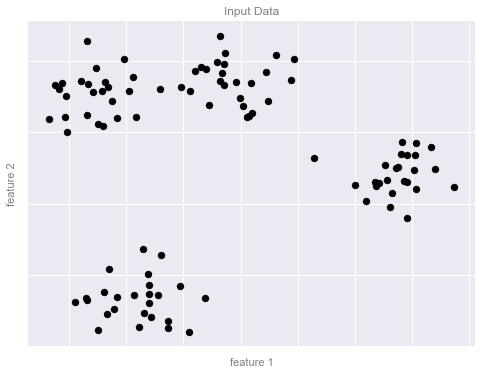

In [14]:
# 画出数据点
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='black')
format_plot(ax, 'Input Data')
#fig.savefig('figures/05.01-clustering-1.png')

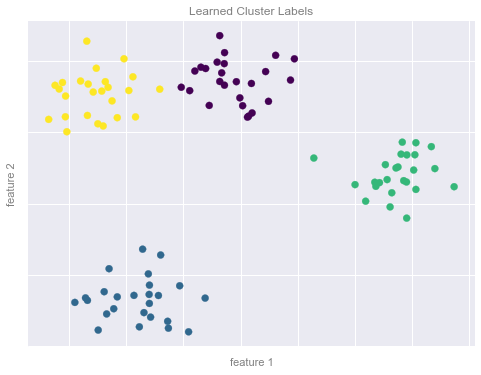

In [16]:
# 画出聚类后的点
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

format_plot(ax, 'Learned Cluster Labels')
#fig.savefig('figures/05.01-clustering-2.png')

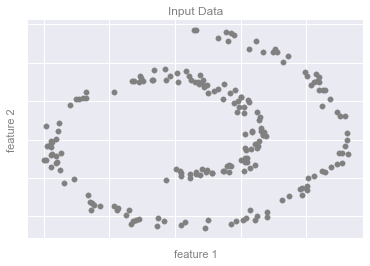

In [18]:
# 降维
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='gray', s=30)
format_plot(ax, 'Input Data')
#fig.savefig('figures/05.01-dimesionality-1.png')

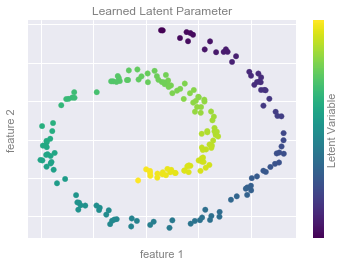

In [19]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)

format_plot(ax, 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Letent Variable', color='gray')

fig.savefig('figures/05.01-dimesionality-2.png')